In [4]:
from qiskit import QuantumCircuit, transpile
import numpy as np
from qiskit.visualization import *
import matplotlib.pyplot as plt
import math
from itertools import repeat
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from math import pi
from qiskit_ibm_runtime.fake_provider import FakeCairoV2
from qiskit.primitives import Sampler as PrimitiveSampler
from qiskit_ibm_runtime import Session, Sampler, Options
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
)

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='77c4fd44d223c6449ccd19f492a7a3d3ec15c32067d6a862fb40aefe4fea96376a2e5e34bb5c2817aedc51576224da7d0da4138eaca260a22d9ed48b92d8734d')

s1=[]
s2=[]
s3=[]
s4=[]
t=[]
d1=[]
d2=[]
d3=[]
d4=[]
C=[]
C_AB=[]
dC_AB=[]
dC=[]
P_A=[]
r=5
c=20
p=0.6
op=0
N=4000
paso=5
#backend = service.get_backend("ibm_brisbane")
# backend = service.get_backend("ibmq_qasm_simulator")

In [12]:
#5-6-7
def build_circuit(p, theta, zne):
    state = np.array([np.sqrt(p/4),-np.sqrt(p/4),np.sqrt(p/4),np.sqrt((4-3*p)/4)])
    
    q1=QuantumCircuit(16,2)  
    # q1.initialize(state,[4,5])
    
    q2=QuantumCircuit(16,2)  
    q2.cx(4,15)
    q2.cry(np.pi-2*theta,15,3)
    q2.cx(5,4)
    q2.cx(5,3)
    q2.cz(4,3)
    q2.cx(3,15)
    q2.h(3)
    q2.h(15)
    

    i = zne
    
    q=q1.compose(q2)
    qd=q2.inverse().compose(q1)
    qf=q
    
    if i>1:
        for k in range(i-1):
            if k%2==0:
                qf=qf.compose(qd)
            else:
                qf=qf.compose(q)

    qf.measure([3,15],[0,1])
    return qf

In [13]:
s_size = 5
N = 4000
angles = 5
zne_size = 4
p = 0.6

circuits = []
thetas = np.linspace(0.1, pi / 2 - 0.1, angles)
for t in thetas:
    for i in range(zne_size):
        circuits.extend(repeat(build_circuit(p, t, i), s_size))

pm = generate_preset_pass_manager(target=backend.target, optimization_level=3)
isa_circuits = pm.run(circuits)

options = Options()
options.resilience_level = 1

with Session(service=service, backend="ibm_brisbane") as session:
    sampler = Sampler(session=session, options=options) 
    job = sampler.run(isa_circuits, shots=N)
    counts=job.result().quasi_dists

temp1=[]
temp2=[]
temp3=[]
temp4=[]
for i in range(5):
    for j in range(i*c,(i+1)*c):
        temp1.append(counts[j].binary_probabilities().get('00',0))
        temp2.append(counts[j].binary_probabilities().get('01',0))
        temp3.append(counts[j].binary_probabilities().get('10',0))
        temp4.append(counts[j].binary_probabilities().get('11',0))
    
    d1=np.std(temp1)
    d2=np.std(temp2)
    d3=np.std(temp3)
    d4=np.std(temp4)
    s1=sum(temp1)/c#pxh
    s2=sum(temp2)/c#pyh
    s3=sum(temp3)/c#pxv
    s4=sum(temp4)/c#pyv
    temp1=[]
    temp2=[]
    temp3=[]
    temp4=[] 
    C_AB.append(np.abs(s1-s2-s3+s4))
    dC_AB.append(np.sqrt(d1**2+d2**2+d3**2+d4**2))

    
ts=[paso*np.pi*k/180 for k in thetas]

/home/josue/Projects/physics/hermes/.venv/lib/python3.11/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:927: UserWarning: Starting a session using the /jobs endpoint will no longer be supported after March 31, 2024. Please update your code as soon as possible before this date. If you are using qiskit-ibm-runtime, you will need version 0.20.0 or higher. If you are using qiskit-ibm-provider, you will need version 0.10.0 or higher. If you are calling the API directly, please use the /sessions endpoint instead.
  warnings.warn(warning_message)


RuntimeJobFailureError: 'Unable to retrieve job result. Circuits do not match the target definition (non-ISA circuits). -- \\n        Transpile your circuits for the target before submitting a primitive query. For\\n        example, you can use the following code block given an IBMBackend object `backend`\\n        and circuits of type `List[QuantumCircuit]`:\\n            from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager\\n            pm = generate_preset_pass_manager(optimization_level=1, target=backend.target)\\n            isa_circuits = pm.run(circuits)\\n        Then pass `isa_circuits` to the Sampler or Estimator.\\n         -- https://ibm.biz/error_codes#1517'

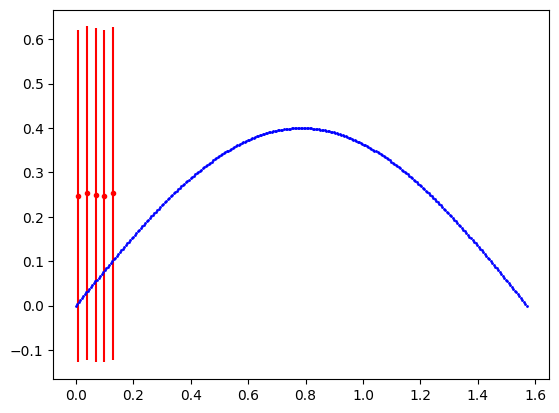

In [32]:
th = np.linspace(0, pi/2, 300,endpoint=True)
C = (1-p)*np.abs(np.sin(2*th))

plt.errorbar(ts, C_AB, dC_AB, fmt = 'r.')
plt.plot(th,C,'b.', markersize=2)

In [9]:
zne_con

[0.01912642661410092,
 0.27943736446619705,
 0.377587500435021,
 0.40725597583394263,
 0.11447301624853219]

In [10]:
dC_AB

[0.17737677780796368,
 0.2186843952498506,
 0.13129567377633566,
 0.297807939239187,
 0.23965180227053154]